# AI project: Traffic Sign Recognition

Using ML classification model

Dataset obtained from https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification

- 34 classes
- 64x64 grayscale images
- Trained over 2700+ images
- Achieved over 90% accuracy

In [1]:
!pip install numpy pandas scikit-learn scikit-image matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from skimage.transform import resize
from skimage.io import imread
import os
from random import sample, seed

In [3]:
train_path="./traffic_Data/DATA/"
test_path="./traffic_Data/TEST/"
labels="./labels.csv"

In [4]:
df = pd.read_csv(labels, index_col='ClassId')
df['Count'] = df.apply(lambda r: len(os.listdir(train_path + str(r.name))), axis=1)
df = df[~df['Name'].str.startswith('Unknown')]
df = df[df['Count'] >= 20]
df

,Name,Count
ClassId,,
0,Speed limit (5km/h),118
1,Speed limit (15km/h),40
2,Speed limit (30km/h),80
3,Speed limit (40km/h),260
4,Speed limit (50km/h),98
5,Speed limit (60km/h),194
6,Speed limit (70km/h),78
7,speed limit (80km/h),152
10,Dont Go straight,70


<BarContainer object of 34 artists>

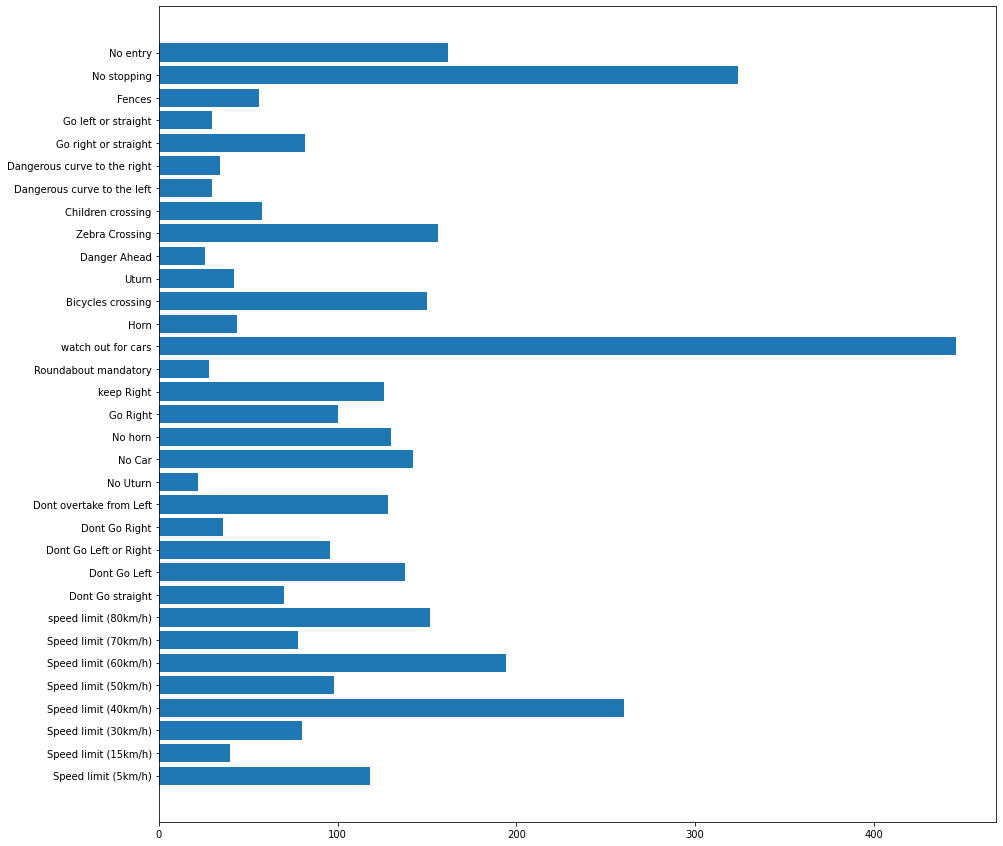

In [5]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.barh(df['Name'], df['Count'])

In [6]:
classes = df.index
len(classes)

34

In [7]:
def read_img(f):
    img_array = imread(f, as_gray=True)
    img_resized = resize(img_array, (64, 64))
    return img_resized

In [8]:
flat_data_arr = [] # input array
target_arr = [] # output array

for cls in classes:    
    path = os.path.join(train_path, str(cls))
    for img in os.listdir(path):
        flat_data_arr.append(read_img(os.path.join(path, img)).flatten())
        target_arr.append(cls)
        
print('Loaded all the images!')
        
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

df2 = pd.DataFrame(flat_data)
df2['Target'] = target

x =  df2.iloc[:,:-1] # input data
y = df2.iloc[:,-1] # output data

Loaded all the images!


In [9]:
# Create a classifier: a support vector classifier
model = svm.SVC()

print('Model selected!')

# Split data into 75% train and 25% test subsets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=123)

print('Dataset splitted!')

# Learn the signs on the train subset
model.fit(X_train, y_train)

print('Training complete!')

# Predict the sign on the test subset
predicted = model.predict(X_test)

print('Predicted test data')

Model selected!
Dataset splitted!
Training complete!
Predicted test data


In [10]:
print("Accuracy score")
round(accuracy_score(y_test, predicted) * 100, 2)

Accuracy score


90.74

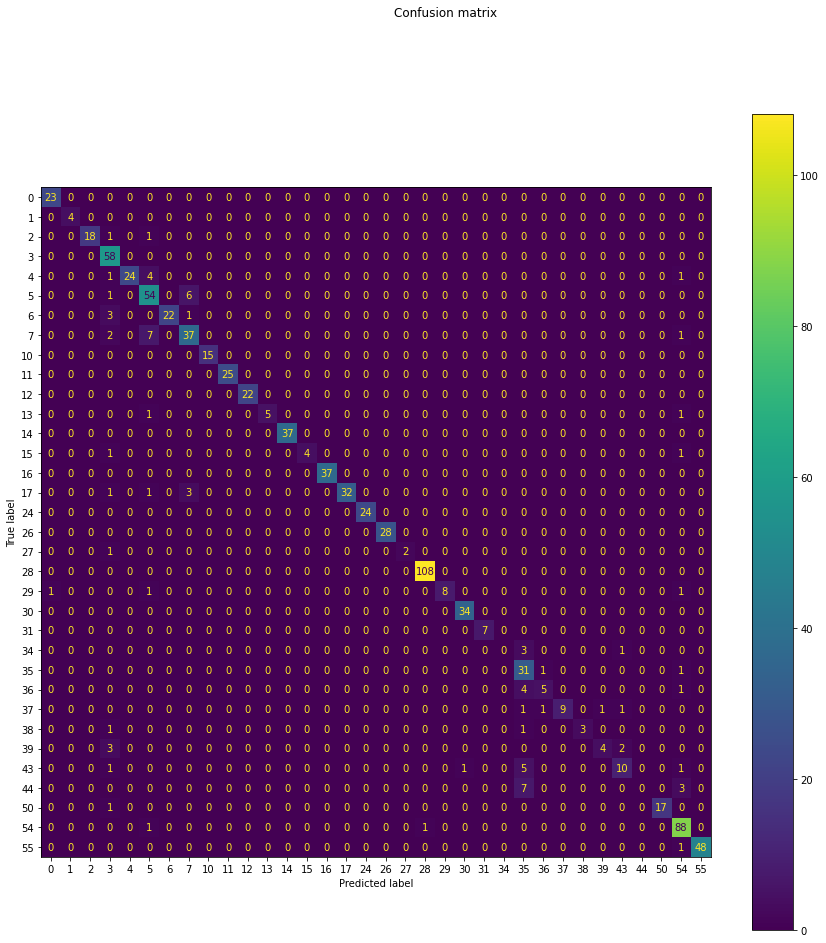

In [11]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion matrix")
plt.show()

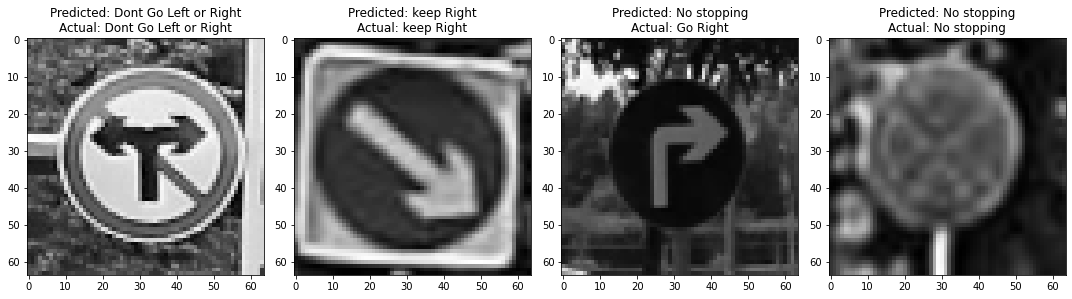

In [12]:
seed(123)
fig = plt.figure()
r,c = 1, 4
samples = [f for f in os.listdir(test_path) if int(f.split('_')[0]) in classes]
for i, f in enumerate(sample(samples, r*c)):
    ax = fig.add_subplot(r,c,i+1)
    f = samples[i]
    img = read_img(os.path.join(test_path, f))
    p = model.predict([img.flatten()])[0]
    p_cls = df.loc[p]['Name']
    a_cls = df.loc[int(f.split('_')[0])]['Name']
    ax.set_title(f"Predicted: {p_cls}\nActual: {a_cls}")
    ax.imshow(img, cmap='gray')
plt.tight_layout()
plt.show()